<h1 align ='center'> Data Science Capstone Project</h1>
<h2 align = 'center'>Finding most suitable place to open a Residency Inn in the Capital city of Telangana, India.</h2>

## The battle of neighborhoods
## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. Introduction
2. Data Scraping
3. Data Wrangling
4. Exploring Neighborhood
5. Cluster Neighborhoods
6. Examine Clusters   
7. Conclusion
</font>
</div>

## 1. Introduction 
#### Idea Behind Project
   In this Capstone Project, I am assuming a concept of opening a Residency hotel who are exploring for a best location to open a Residency Inn in Twin cities. The idea behind this project is it’s a capital city of Telangana which attracts several people for a holiday and has several monument areas to visit. If you have never been here, I recommend to explore this South Indian place and if you are in an idea to open a hotel for business, I invite you to explore this project and you can find useful.

##### Business proposal
Our project objective is to find a suitable and lovely place surrounded with different popular places across twin cities (Hyderabad and Secunderabad). This can make business lucrative. Then let's discuss the factors for an ideal neighborhood in a holiday. These can be Restaurants, Museums, Theme Parks, Temples, Historic Monuments, Famous Bazaars, Transportation Areas etc.
Using our Data Science Methods, we try to cluster the top areas in the neighborhood and aim to locate a place to answer the question: “What is the most suitable place to open a lucrative Residency Hotel in Twin cities?” 
Target Audience:
	People who are looking to open a Residency Inn in the capital city of Telangana, IN.
#### Data Section
What data is needed?
The data needed for this project is 
1.	Areas across the cities Hyderabad and Secunderabad.
2.	Latitude and Longitude values for those areas.
3.	All famous venues in the neighborhood of those areas.

Data Extraction
1.	Finding required area data of Twin cities from a Wikipedia page.
2.	Finding Latitude and Longitude values using Geocoder package.
3.	Exploring all famous venues that are related to our project in the neighborhood using Foursquare API.


Different types of libraries included to develop prooject:
1. numpy - to handle data in a vectorized manner
2. pandas - library for data analysis
3. geocoder - geocoding library written in python
4. json - library to handle json files
5. requests - library to handle requests
6. Nominatim - convert an address into Latitude and Longitude values
7. matlplotlib - library for plotting daa and visualizations
8. sklearn - Machine learning library for python
9. folium - map rendering library


In [1]:
import numpy as np 
import pandas as pd 
import geocoder
import json 
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Required Libraries imported.')

Required Libraries imported.


## 2. Data Scraping

Get the area data from wikipedia of all zones and circles in Hyderabad district and transform it to dataframe

In [2]:
url="https://en.wikipedia.org/wiki/Hyderabad_Corporation_zones,_circles_and_wards"
results = pd.read_html(url,header=0)[0]
results.head(10)

,Zone,Circle No.,Circle name,Ward
0,L. B. Nagar,1,Kapra,1. Kapra
1,L. B. Nagar,1,Kapra,2. Dr AS Rao Nagar
2,L. B. Nagar,1,Kapra,3. Cherlapally
3,L. B. Nagar,1,Kapra,4. Meerpet HB Colony
4,L. B. Nagar,1,Kapra,5. Mallapur
5,L. B. Nagar,1,Kapra,6. Nacharam
6,L. B. Nagar,2,Uppal,7. Chilukanagar
7,L. B. Nagar,2,Uppal,8. Habsiguda
8,L. B. Nagar,2,Uppal,9. Ramanthapur
9,L. B. Nagar,2,Uppal,10. Uppal


Clean the dataframe by dropping unused columns and duplicates.<br/>
Here the Circle related columns are dropped. Finally drop the duplicate records if any.

In [3]:
results.drop('Circle name',axis=1,inplace = True)
results.drop('Circle No.',axis=1,inplace=True)
results.drop_duplicates(subset='Ward',inplace=True)
results.reset_index(drop=True,inplace =True)
results.head()

,Zone,Ward
0,L. B. Nagar,1. Kapra
1,L. B. Nagar,2. Dr AS Rao Nagar
2,L. B. Nagar,3. Cherlapally
3,L. B. Nagar,4. Meerpet HB Colony
4,L. B. Nagar,5. Mallapur


Lets format the data in ward column

In [4]:
def fltr(val):
    try:
        a=((val).split('-')[1])[1:]
    except:
        a=((val).split('.')[1])[1:]
    return a

results['Ward']=(results['Ward'].apply(fltr))
results.head()

,Zone,Ward
0,L. B. Nagar,Kapra
1,L. B. Nagar,Dr AS Rao Nagar
2,L. B. Nagar,Cherlapally
3,L. B. Nagar,Meerpet HB Colony
4,L. B. Nagar,Mallapur


## 3. Data Wrangling

### Pre-Processing Data

Its time to find the position of each entry in the dataframe.<br/>
Geocoder, a python package would help in retreiving the Latitude and Longitude values from the Ward name.<br/>
The latitude and longitude are two lists that stores values respective to the entries in dataframe.<br/>
Append 'Nan' if location not found.

In [5]:
#provides latitude and longitude values for a dataframe that consists Postalcode column
def get_ll_df(df):
    # initialize your variable to None
    latitude=[]
    longitude=[]
    for ps in df['Ward']:
        # loop until you get the coordinates
        location = None
        while(location is None):
            g = geocoder.arcgis('{}, Telangana, India'.format(ps))
            location = g.latlng
            if location != None:
                latitude.append(location[0])
                longitude.append(location[1])
            else:
                latitude.append('Nan')
                longitude.append('Nan')
    return [latitude,longitude]

Print the values of latitude and longitude and observe that some values are not found by geocoder

In [6]:
loc = get_ll_df(results)
latitude=loc[0]
longitude=loc[1]

Store the values in DataFrame.

In [7]:
ts_df = pd.DataFrame(data = {'zone':results['Zone'],'ward':results['Ward'],'latitude':latitude,'longitude' :longitude})
ts_df['latitude']=ts_df['latitude'].astype(float)
ts_df['longitude']=ts_df['longitude'].astype(float)
print(ts_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
zone         150 non-null object
ward         150 non-null object
latitude     150 non-null float64
longitude    150 non-null float64
dtypes: float64(2), object(2)
memory usage: 4.8+ KB
None


### Cleaning data

Drop the records for which the latitude and longitude values are not found i.e(NAN) if any.

In [8]:
ts_df.dropna(axis=0,inplace=True)
ts_df.reset_index(drop=True,inplace=True)
print(ts_df.info())
print(ts_df.shape)
ts_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
zone         150 non-null object
ward         150 non-null object
latitude     150 non-null float64
longitude    150 non-null float64
dtypes: float64(2), object(2)
memory usage: 4.8+ KB
None
(150, 4)


,zone,ward,latitude,longitude
0,L. B. Nagar,Kapra,17.48887,78.56242
1,L. B. Nagar,Dr AS Rao Nagar,17.47605,78.56183
2,L. B. Nagar,Cherlapally,17.46648,78.59999
3,L. B. Nagar,Meerpet HB Colony,17.44615,78.54959
4,L. B. Nagar,Mallapur,18.94718,78.76027


Drop the records which are not inside Hyderabad District

In [9]:
ts_df = ts_df[[True if (17.238399<lat<17.601877 and 78.324089<lon<78.611980) else False for (lat,lon) in zip(ts_df['latitude'],ts_df['longitude'])]].reset_index(drop=True)
print("Total number of records {}".format(ts_df.shape[0]))
ts_df.head()

Total number of records 118


,zone,ward,latitude,longitude
0,L. B. Nagar,Kapra,17.48887,78.56242
1,L. B. Nagar,Dr AS Rao Nagar,17.47605,78.56183
2,L. B. Nagar,Cherlapally,17.46648,78.59999
3,L. B. Nagar,Meerpet HB Colony,17.44615,78.54959
4,L. B. Nagar,Nacharam,17.43351,78.56673


In [17]:
ts_counts = pd.DataFrame((ts_df.groupby(['zone']).count())['ward'])
ts_counts.columns=['Count']
ts_counts

,Count
zone,
Charminar,32
Khairatabad,22
Kukatpally,15
L. B. Nagar,19
Secunderabad,22
Serilingampally,8


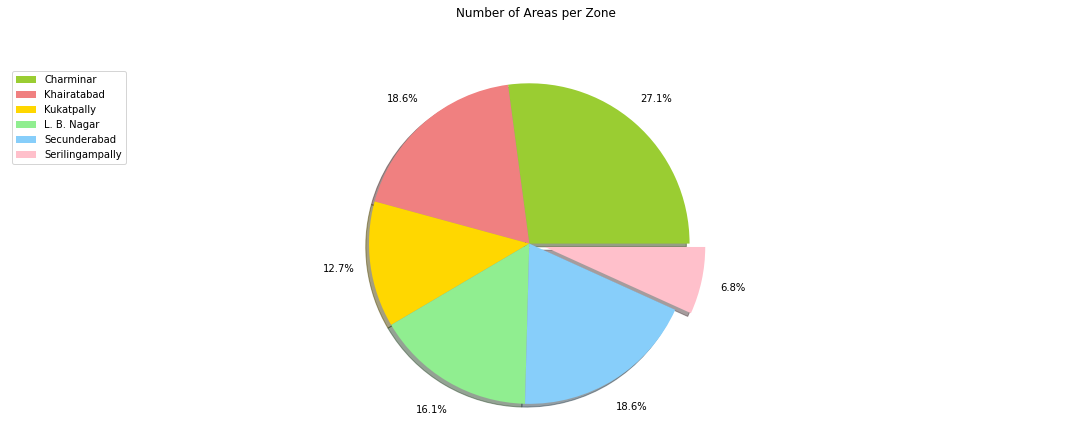

In [20]:
colors_list = ['yellowgreen', 'lightcoral','gold', 'lightgreen', 'lightskyblue', 'pink']
explode_list = [0, 0, 0, 0, 0, 0.1] # ratio for each continent with which to offset each wedge.

ts_counts['Count'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=0,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.2,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Number of Areas per Zone', y=1.12) 
plt.ylabel('')
plt.axis('equal') 
plt.tight_layout()
# add legend
plt.legend(labels=ts_counts.index, loc='upper left') 
plt.savefig('ZonalPieChart.jpg')

Lets create a folium map locate all the areas that we are considering in Hyderabad District

In [21]:
address = 'secunderabad, IN'
geolocator = Nominatim(user_agent="ts_xplor")
location = geolocator.geocode(address)
#store lat and long for map
sec_lat = location.latitude
sec_lon = location.longitude

In [22]:
# create map of Hyderabad District using latitude and longitude values
map_ts = folium.Map(location=[sec_lat, sec_lon], zoom_start=11)

# add markers to map
for lat, lng, md in zip(ts_df['latitude'], ts_df['longitude'], ts_df['ward']):    
    label = folium.Popup(md, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ts)      
map_ts

That looks nice!<br/>It's time to explore the places and foursquare API finds and gives response in a json file.

## 4. Exploring Neighborhood 

In [23]:
CLIENT_ID = 'ZIVVOLX5LOSIMAULVFZRZLHA3HBXHAXB4AC1O4LRR3EFULJK' # your Foursquare ID
CLIENT_SECRET = 'BS4DZIJFSZ55MGOHHSXU5Y1IPE1K0CZCWNOAPWXTYSDAQ0LD' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: ZIVVOLX5LOSIMAULVFZRZLHA3HBXHAXB4AC1O4LRR3EFULJK
CLIENT_SECRET:BS4DZIJFSZ55MGOHHSXU5Y1IPE1K0CZCWNOAPWXTYSDAQ0LD


In [24]:
# function to get near by venues by passing values 
def getNearbyVenues(names, latitudes, longitudes, radius=500):   
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)           
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']     
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['ward', 
                  'ward Latitude', 
                  'ward Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
#lets fetch first 100 results
LIMIT=100
hyd_venues = getNearbyVenues(names=ts_df['ward'],latitudes=ts_df['latitude'],longitudes=ts_df['longitude'])


Kapra
Dr AS Rao Nagar
Cherlapally
Meerpet HB Colony
Nacharam
Chilukanagar
Habsiguda
Ramanthapur
Nagole
Mansoorabad
Hayaat nagar
BN Reddy Nagar
Vanasthalipuram
Hastinapuram
Champapet
Saroornagar
Rama Krishna Puram
Chaitanyapuri
Gaddiannaram
Moosrambagh
Old Malakpet
Azampura
Chawani
Dabeerpura
Rein Bazar
Gowlipura
Kurmaguda
IS SADAN
Santosh Nagar
Lalithbagh
Riyasath Nagar
Kanchanbagh
Barkas
Chandrayangutta
Uppuguda
Jangammet
Pathergatti
Shalibanda
Ghansi Bazar
Puranapul
Falaknuma
Nawab Saheb Kunta
Doodbowli
Jahanuma
Ramnaspura
Kishanbagh
Rajendra Nagar
Attapur
Suleman Nagar
Shastri puram
Mylardevpally
Mehdipatnam
Red Hills
Mallepally
Ziaguda
Karwan
Langer House
Golconda
Tolichowki
Nanalnagar
Begum Bazar
Gosha Mahal
Manghalhat
Dattathreyanagar
Jambagh(Nampally)
Gunfoundry
Khairtabad
Somajiguda
Ameerpet
Sanathnagar
Venkateshwara Colony
Banjara Hills
Shaikh pet
Himayathnagar
Kachiguda Barkatpura
Nallakunta
Golnaka
Bagh Amberpet
Adikmet
Musheerabad
Bholakpur
Kavadiguda
Neredmet
Vinayak Nagar

In [27]:
print(hyd_venues.shape)
hyd_venues.head()

(432, 7)


,ward,ward Latitude,ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kapra,17.48887,78.56242,RR rice stores,17.487971,78.564801,Department Store
1,Kapra,17.48887,78.56242,Big Bull Bakery,17.492283,78.565074,Bakery
2,Kapra,17.48887,78.56242,Axis Bank ATM,17.492400,78.565100,ATM
3,Dr AS Rao Nagar,17.47605,78.56183,Woodland Restaurant,17.476646,78.566404,Snack Place
4,Dr AS Rao Nagar,17.47605,78.56183,Parivaar Restaurant,17.476850,78.563525,Indian Restaurant


In [28]:
print("There are {} unique categories around Hyderabad district .".format(len(hyd_venues['Venue Category'].unique())))

There are 120 unique categories around Hyderabad district .


Lets Explore and VIsulaize the top 10 Venue categories and their frequency

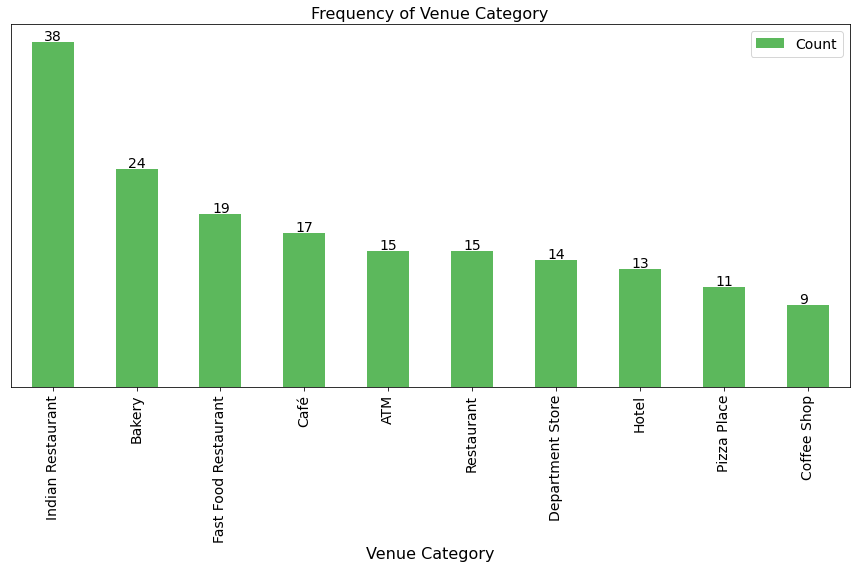

In [29]:
venue_counts = pd.DataFrame((hyd_venues.groupby('Venue Category').count())['Venue']).sort_values(by='Venue',ascending=False)[:10]
venue_counts.columns=['Count']
ax =venue_counts.plot(kind='bar',color='#5cb85c',rot=90,figsize=(12,8),fontsize=14)

ax.get_yaxis().set_ticks([])
ax.set_xlabel("Venue Category",fontsize=16)
ax.set_title("Frequency of Venue Category",fontsize=16)
ax.legend(fontsize=14)
for i in ax.patches:
    ax.text(i.get_x()+0.15,i.get_height()+0.2,str((round((i.get_height()),2))),color='black',fontsize=14)
plt.tight_layout()
plt.savefig('VenueCounts.jpg')

## Transforming data

For clustering data using KMeans the data should be in a vector format and numeric.<br/>
One Hot encoding in pandas can convert this categorical data to numeric.


In [30]:
hyd_onehot = pd.get_dummies(hyd_venues[['Venue Category']],prefix ="",prefix_sep="")
hyd_onehot['ward'] = hyd_venues['ward']
fixed_columns = [hyd_onehot.columns[-1]] + list(hyd_onehot.columns[:-1])
hyd_onehot = hyd_onehot[fixed_columns]
print(hyd_onehot.shape)
hyd_onehot.head()

(432, 121)


,ward,ATM,Accessories Store,Afghan Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,...,Stationery Store,Supermarket,Tea Room,Tennis Court,Tex-Mex Restaurant,Theme Park,Trail,Train Station,Udupi Restaurant,Vegetarian / Vegan Restaurant
0,Kapra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kapra,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Kapra,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Dr AS Rao Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dr AS Rao Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#find the mean of categories
hyd_grouped = hyd_onehot.groupby(['ward']).mean().reset_index()
print(hyd_grouped.shape)
hyd_grouped.head()

(96, 121)


,ward,ATM,Accessories Store,Afghan Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,...,Stationery Store,Supermarket,Tea Room,Tennis Court,Tex-Mex Restaurant,Theme Park,Trail,Train Station,Udupi Restaurant,Vegetarian / Vegan Restaurant
0,Addagutta,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,Adikmet,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,Allwyn Colony,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
3,Ameerpet,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.071429
4,Azampura,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.000000


### Analyze and Explore to the top Venues for each area

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['ward']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
hyd_venues_sorted = pd.DataFrame(columns=columns)
hyd_venues_sorted['ward'] = hyd_grouped['ward']

for ind in np.arange(hyd_grouped.shape[0]):
    hyd_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hyd_grouped.iloc[ind, :], num_top_venues)

hyd_venues_sorted.head()

,ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Addagutta,Rest Area,South Indian Restaurant,Vegetarian / Vegan Restaurant,Food Court,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant
1,Adikmet,Pizza Place,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market
2,Allwyn Colony,ATM,Clothing Store,Bar,Food Stand,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market
3,Ameerpet,Indian Restaurant,Department Store,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Metro Station,Bakery,Buffet,Diner,Hotel,Stationery Store
4,Azampura,Breakfast Spot,Train Station,Indian Restaurant,Vegetarian / Vegan Restaurant,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market


## 5. Cluster Neighborhoods

In [34]:
k = 7 # number of clusters
hyd_km_df = hyd_grouped.drop('ward',axis =1)
hyd_km = KMeans(n_clusters=k).fit(hyd_km_df)
hyd_km.labels_[:10]

array([3, 4, 2, 6, 1, 2, 2, 2, 2, 2])

In [35]:
hyd_venues_sorted.insert(0,'Cluster Labels',hyd_km.labels_)
#merging the data with results to get zone
hyd_final = ts_df
hyd_final = hyd_final.join(hyd_venues_sorted.set_index('ward'),on='ward',how='inner')
hyd_final

,zone,ward,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,L. B. Nagar,Kapra,17.488870,78.562420,2,ATM,Bakery,Department Store,Home Service,Food Court,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant
1,L. B. Nagar,Dr AS Rao Nagar,17.476050,78.561830,6,Clothing Store,Electronics Store,Indian Restaurant,Fast Food Restaurant,Snack Place,Vegetarian / Vegan Restaurant,Food Court,Dessert Shop,Diner,Donut Shop
4,L. B. Nagar,Nacharam,17.433510,78.566730,0,ATM,Udupi Restaurant,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant
6,L. B. Nagar,Habsiguda,17.417120,78.543500,6,Indian Restaurant,Bakery,Restaurant,Vegetarian / Vegan Restaurant,Metro Station,Sandwich Place,Park,BBQ Joint,Food Court,Diner
8,L. B. Nagar,Nagole,17.378930,78.562040,0,ATM,Udupi Restaurant,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Kukatpally,Hydernagar,17.504510,78.383680,2,Bakery,Ice Cream Shop,Pharmacy,Juice Bar,Salon / Barbershop,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market,Vegetarian / Vegan Restaurant
109,Kukatpally,Allwyn Colony,17.503370,78.416020,2,ATM,Clothing Store,Bar,Food Stand,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market
111,Kukatpally,Qutbullapur,17.505360,78.467490,2,Department Store,Breakfast Spot,Housing Development,Bus Station,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market
112,Kukatpally,Jeedimetla,17.521830,78.454330,4,Pizza Place,Lighting Store,Vegetarian / Vegan Restaurant,Food & Drink Shop,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant


Visualize the data on folium Map

In [36]:
# create map of Hyderabad District using latitude and longitude values
map_final = folium.Map(location=[sec_lat, sec_lon], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0,1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# rainbow = ['yellowgreen', 'coral','gold', 'green', 'skyblue', 'pink']

# add markers to map
for lat, lng, md,zn, cl in zip(hyd_final['latitude'], hyd_final['longitude'], hyd_final['ward'],hyd_final['zone'], hyd_final['Cluster Labels']):
    lbl = '{},{}:Cluster{}'.format(md,zn,cl)
    label = folium.Popup(lbl, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cl-1],
        fill=True,
        fill_color=rainbow[cl-1],
        fill_opacity=1,
        parse_html=False).add_to(map_final)
    
map_final

## 6. Examining Clusters

In [37]:
hyd_final.loc[hyd_final['Cluster Labels'] == 0, hyd_final.columns[[1] + list(range(5, hyd_final.shape[1]))]]

,ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Nacharam,ATM,Udupi Restaurant,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant
8,Nagole,ATM,Udupi Restaurant,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant
9,Mansoorabad,ATM,Market,Hostel,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market
12,Vanasthalipuram,ATM,Udupi Restaurant,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant
83,Vinayak Nagar,ATM,Udupi Restaurant,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant


In [38]:
hyd_final.loc[hyd_final['Cluster Labels'] == 1, hyd_final.columns[[1] + list(range(5, hyd_final.shape[1]))]]

,ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Azampura,Breakfast Spot,Train Station,Indian Restaurant,Vegetarian / Vegan Restaurant,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market
104,Fathe Nagar,Train Station,Vegetarian / Vegan Restaurant,Food Court,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market


In [39]:
hyd_final.loc[hyd_final['Cluster Labels'] == 2, hyd_final.columns[[1] + list(range(5, hyd_final.shape[1]))]]

,ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kapra,ATM,Bakery,Department Store,Home Service,Food Court,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant
10,Hayaat nagar,Health & Beauty Service,Vegetarian / Vegan Restaurant,Food Court,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market
11,BN Reddy Nagar,ATM,Tennis Court,Pharmacy,Afghan Restaurant,Food Court,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store
14,Champapet,Garden Center,Boutique,Shoe Store,Vegetarian / Vegan Restaurant,Food & Drink Shop,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store
15,Saroornagar,Lake,Movie Theater,Scenic Lookout,Asian Restaurant,Indie Movie Theater,Fast Food Restaurant,Food,Flower Shop,Flea Market,Falafel Restaurant
...,...,...,...,...,...,...,...,...,...,...,...
106,Kukatpally,Mobile Phone Shop,Snack Place,Vegetarian / Vegan Restaurant,Food Court,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant
108,Hydernagar,Bakery,Ice Cream Shop,Pharmacy,Juice Bar,Salon / Barbershop,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market,Vegetarian / Vegan Restaurant
109,Allwyn Colony,ATM,Clothing Store,Bar,Food Stand,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market
111,Qutbullapur,Department Store,Breakfast Spot,Housing Development,Bus Station,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market


In [40]:
hyd_final.loc[hyd_final['Cluster Labels'] == 3, hyd_final.columns[[1] + list(range(5, hyd_final.shape[1]))]]

,ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
46,Rajendra Nagar,Bakery,Vegetarian / Vegan Restaurant,Food Stand,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant
87,Addagutta,Rest Area,South Indian Restaurant,Vegetarian / Vegan Restaurant,Food Court,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant
96,Vengalrao Nagar,Bakery,South Indian Restaurant,Vegetarian / Vegan Restaurant,Food Court,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant
103,KPHB Colony,South Indian Restaurant,Dessert Shop,Shopping Mall,Vegetarian / Vegan Restaurant,Food Court,Department Store,Diner,Donut Shop,Electronics Store,Falafel Restaurant


In [41]:
hyd_final.loc[hyd_final['Cluster Labels'] == 4, hyd_final.columns[[1] + list(range(5, hyd_final.shape[1]))]]

,ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Hastinapuram,ATM,Pizza Place,Home Service,History Museum,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store
78,Adikmet,Pizza Place,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market
112,Jeedimetla,Pizza Place,Lighting Store,Vegetarian / Vegan Restaurant,Food & Drink Shop,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant


In [42]:
hyd_final.loc[hyd_final['Cluster Labels'] == 5, hyd_final.columns[[1] + list(range(5, hyd_final.shape[1]))]]

,ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Rein Bazar,Café,Vegetarian / Vegan Restaurant,Deli / Bodega,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant
52,Red Hills,Café,Ice Cream Shop,Bakery,Vegetarian / Vegan Restaurant,Food Court,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant
55,Karwan,Café,Vegetarian / Vegan Restaurant,Deli / Bodega,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant


In [43]:
hyd_final.loc[hyd_final['Cluster Labels'] == 6, hyd_final.columns[[1] + list(range(5, hyd_final.shape[1]))]]

,ward,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Dr AS Rao Nagar,Clothing Store,Electronics Store,Indian Restaurant,Fast Food Restaurant,Snack Place,Vegetarian / Vegan Restaurant,Food Court,Dessert Shop,Diner,Donut Shop
6,Habsiguda,Indian Restaurant,Bakery,Restaurant,Vegetarian / Vegan Restaurant,Metro Station,Sandwich Place,Park,BBQ Joint,Food Court,Diner
19,Moosrambagh,Café,Hookah Bar,Indian Restaurant,Convenience Store,Park,Gym / Fitness Center,Flower Shop,Department Store,Home Service,Dessert Shop
28,Santosh Nagar,Indian Restaurant,Pizza Place,Music Venue,Vegetarian / Vegan Restaurant,Food & Drink Shop,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store
37,Shalibanda,Hotel,Dessert Shop,Theme Park,Electronics Store,Indian Restaurant,Food Court,Department Store,Diner,Donut Shop,Falafel Restaurant
51,Mehdipatnam,Fast Food Restaurant,Hookah Bar,Tea Room,Pizza Place,Restaurant,Farmers Market,Indian Restaurant,Juice Bar,Golf Course,Flea Market
53,Mallepally,Juice Bar,Indian Restaurant,Afghan Restaurant,Snack Place,Food & Drink Shop,Food,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market
59,Nanalnagar,Indian Restaurant,Ice Cream Shop,Intersection,Seafood Restaurant,Department Store,Falafel Restaurant,Asian Restaurant,BBQ Joint,Bakery,Middle Eastern Restaurant
64,Jambagh(Nampally),Bakery,Indian Restaurant,Platform,Fried Chicken Joint,Food,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market,Vegetarian / Vegan Restaurant
68,Ameerpet,Indian Restaurant,Department Store,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Metro Station,Bakery,Buffet,Diner,Hotel,Stationery Store


## 7. Conclusion

Finally we have made to end. This project helped me to explore myself in field of datascience. The analysis drawed the following conclusions.   
   1. This project gives the different categories where in here the cluster2 is larger among all and contains places such as Shopping and places to visit.
   2. The next useful cluster for us would be cluster3 with restaurants. We can also consider cluster6 with Snack Places and Food courts.While the cluster0 is full of Departmental Stores and ATM nearby while this is a better place for people who are looking to move.<br/>
   3. If a residency Hotel is covering some areas around these clusters then people would love to explore places nearby.